In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import Dataset

In [2]:
class CityScapeTrainDataset(Dataset):
    def __init__(self):
        self._root_path = os.path.join('/datasets', 'cityscapes/')
        self._image_path = os.path.join(self._root_path, 'leftImg8bit')
        self._gt_path = os.path.join(self._root_path, 'gtFine')
        self._train_img_path = os.path.join(self._image_path, 'train')
        self._train_gt_path = os.path.join(self._gt_path, 'train')
        self._img_names = []
        self._gt_names = []
        cities = os.listdir(self._train_img_path)
        for city in cities:
            for file in os.listdir(os.path.join(self._train_img_path, city)):
                if file.endswith('.png'):
                    self._img_names.append(os.path.join(city,file))
            for file in os.listdir(os.path.join(self._train_gt_path, city)):
                if file.endswith('color.png'):
                    self._gt_names.append(os.path.join(city,file))
        self._img_names.sort()
        self._gt_names.sort()
    def __getitem__(self, index):
        img_path = os.path.join(self._train_img_path, self._img_names[index])
        img = np.array(cv2.imread(img_path))
        gt_path = os.path.join(self._train_gt_path, self._gt_names[index])
        gt = np.array(cv2.imread(gt_path))
        return img, gt
        
    def __len__(self):
        return len(self._img_names)
        
        

In [3]:
_root_path = os.path.join('/datasets', 'cityscapes/')
_image_path = os.path.join(_root_path, 'leftImg8bit')
_train_img_path = os.path.join(_image_path, 'train','aachen')

In [4]:
len(os.listdir(_train_img_path))

174

In [3]:
training_dataset = CityScapeTrainDataset()

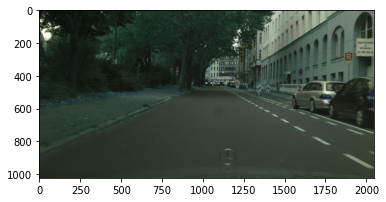

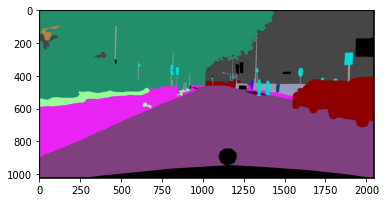

In [20]:
plt.imshow(training_dataset[2][0])
plt.show()
plt.imshow(training_dataset[2][1])
plt.show()

In [19]:
training_dataset[2][1][200,100]

array([ 35, 142, 107], dtype=uint8)